In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
# Example: the Dense layer has 2 parameters: the number of units and the activation function

layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights for the layer

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([[ 0.41109705, -0.04479903,  0.8523675 ],
       [ 0.77029467,  0.925513  , -0.40693378],
       [-0.5526812 , -0.65951824, -0.5410856 ],
       [-0.6525581 , -0.8841853 ,  0.7163516 ]], dtype=float32), array([0., 0., 0.], dtype=float32)]
Trainable weights: [<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.41109705, -0.04479903,  0.8523675 ],
       [ 0.77029467,  0.925513  , -0.40693378],
       [-0.5526812 , -0.65951824, -0.5410856 ],
       [-0.6525581 , -0.8841853 ,  0.7163516 ]], dtype=float32)>, <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
Non-trainable weights: []


In [6]:
# Example: the BatchNormalization layer has 4 parameters: the momentum, the epsilon, the center and the scale

layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights for the layer

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([1., 1., 1., 1.], dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1.], dtype=float32)]
Trainable weights: [<tf.Variable 'gamma:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, <tf.Variable 'beta:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
Non-trainable weights: [<tf.Variable 'moving_mean:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'moving_variance:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>]


In [7]:
# Example: setting the trainable attribute of a layer to False

layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights for the layer
layer.trainable = False  # Set the layer to be non-trainable

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([[-0.5896051 ,  0.77761996, -0.1534015 ],
       [ 0.7767955 , -0.31880933, -0.6718044 ],
       [-0.41591763,  0.24947679,  0.71104765],
       [-0.67213994,  0.02418327,  0.10343516]], dtype=float32), array([0., 0., 0.], dtype=float32)]
Trainable weights: []
Non-trainable weights: [<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.5896051 ,  0.77761996, -0.1534015 ],
       [ 0.7767955 , -0.31880933, -0.6718044 ],
       [-0.41591763,  0.24947679,  0.71104765],
       [-0.67213994,  0.02418327,  0.10343516]], dtype=float32)>, <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [10]:
# When a trainable layer is set to non-trainable, its weights are moved from the trainable_weights list to the non_trainable_weights list. 
# This means that the weights of the layer will not be updated during training, and they will not contribute to the loss function.
# Make a model with 2 Layers, one trainable and one non-trainable
input = keras.Input(shape=(3,))
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")

model = keras.Sequential([input, layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Get the initial weights of the first layer
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.rand(10, 3), np.random.rand(10, 3))

# Check that the weight of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()

np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)

np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

1/1 [==============================] - 0s 308ms/step - loss: 0.0699


In [12]:
# Rescursive setting of the trainable attribute of a layer to False

inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid")]
)

model.trainable = False  # Set the entire model to be non-trainable

assert inner_model.trainable == False # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False # `trainable` is propagated recursively

print("All layers in the model are non-trainable.")
print("The weights of the layers will not be updated during training.")

All layers in the model are non-trainable.
The weights of the layers will not be updated during training.


In [14]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()  # Disable the progress bar for loading datasets

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserver 10% of the data for validation and 10% for testing
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True, # Include labels in the dataset
)

print("Number of training samples: $d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: $d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: $d" % tf.data.experimental.cardinality(test_ds))

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Dataset cats_vs_dogs downloaded and prepared to /home/dev-algo/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Number of training samples: $d
Number of validation samples: $d
Number of test samples: $d


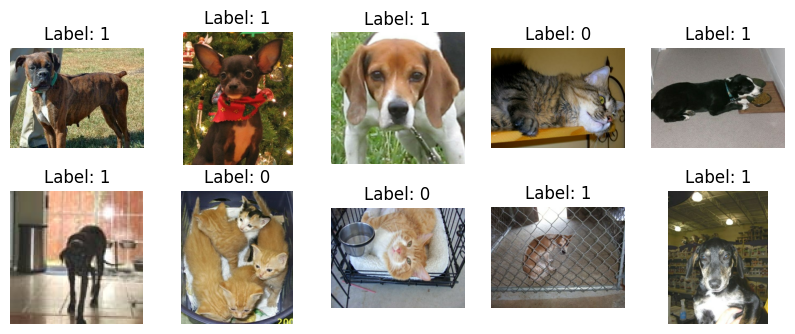

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(10)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("Label: %d" % label.numpy())
    plt.axis("off")

In [18]:
# Standardize the data

size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

print("Data has been standardized to size: %s" % str(size))
print("Train dataset:", train_ds)
print("Validation dataset:", validation_ds)
print("Test dataset:", test_ds)

Data has been standardized to size: (150, 150)
Train dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Test dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [19]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

print("Data has been batched with batch size: %d" % batch_size)
print("Train dataset:", train_ds)
print("Validation dataset:", validation_ds)
print("Test dataset:", test_ds)

Data has been batched with batch size: 32
Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [20]:
# Using Random Data Augmentation

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

2026-02-23 14:26:16.399162: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


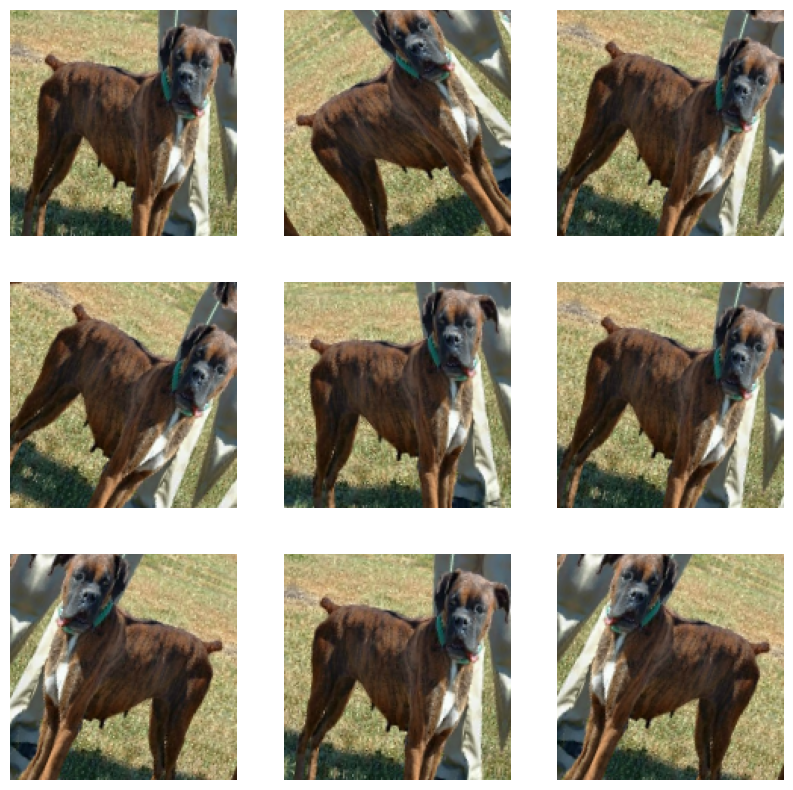

In [21]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")